# Assignment 2 : Clustering 해보기
1. Preprocessing & EDA
2. Clustering (세가지 방법 +)
3. Evaluation

In [1]:
# #-*- coding: utf-8 -*-

In [2]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns; sns.set
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#일반적인 경고 메세지는 무시
import warnings
warnings.filterwarnings("ignore")

In [4]:
# 그래프 한글 깨짐 방지 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 1. Preprocessing & EDA

In [5]:
df = pd.read_csv('Mall_Customers.csv', encoding='cp949')

In [6]:
df.head(15) # 데이터 확인

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [7]:
# 결측치 확인 -> 없음!
df.isnull().sum(axis=0)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

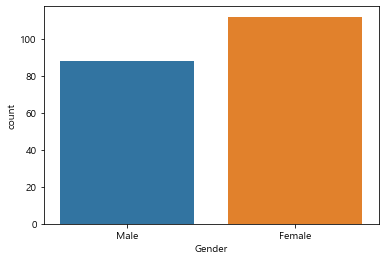

In [8]:
# 성별 plot
sns.countplot("Gender" ,data=df)
plt.show()

In [9]:
X = df.iloc[:, [3, 4]].values

In [10]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
# 성별은 범주형 변수이므로 원핫인코딩 하자
# 이 경우는 차원이 하나 더 늘어남!
df2 = pd.get_dummies(df, columns = ['Gender'], prefix = ['Gender'])

In [12]:
df2.head() #데이터 확인

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


# 2. Clustering

###### 본격적인 클러스터링에 앞서 자료를 먼저 살펴보자

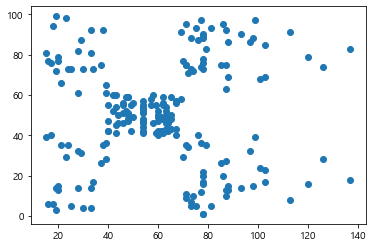

In [13]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()
# 직관적으로 군집이 보임

## 2-1. Agglomerative Hierarchical Clustering

In [14]:
from sklearn.cluster import AgglomerativeClustering

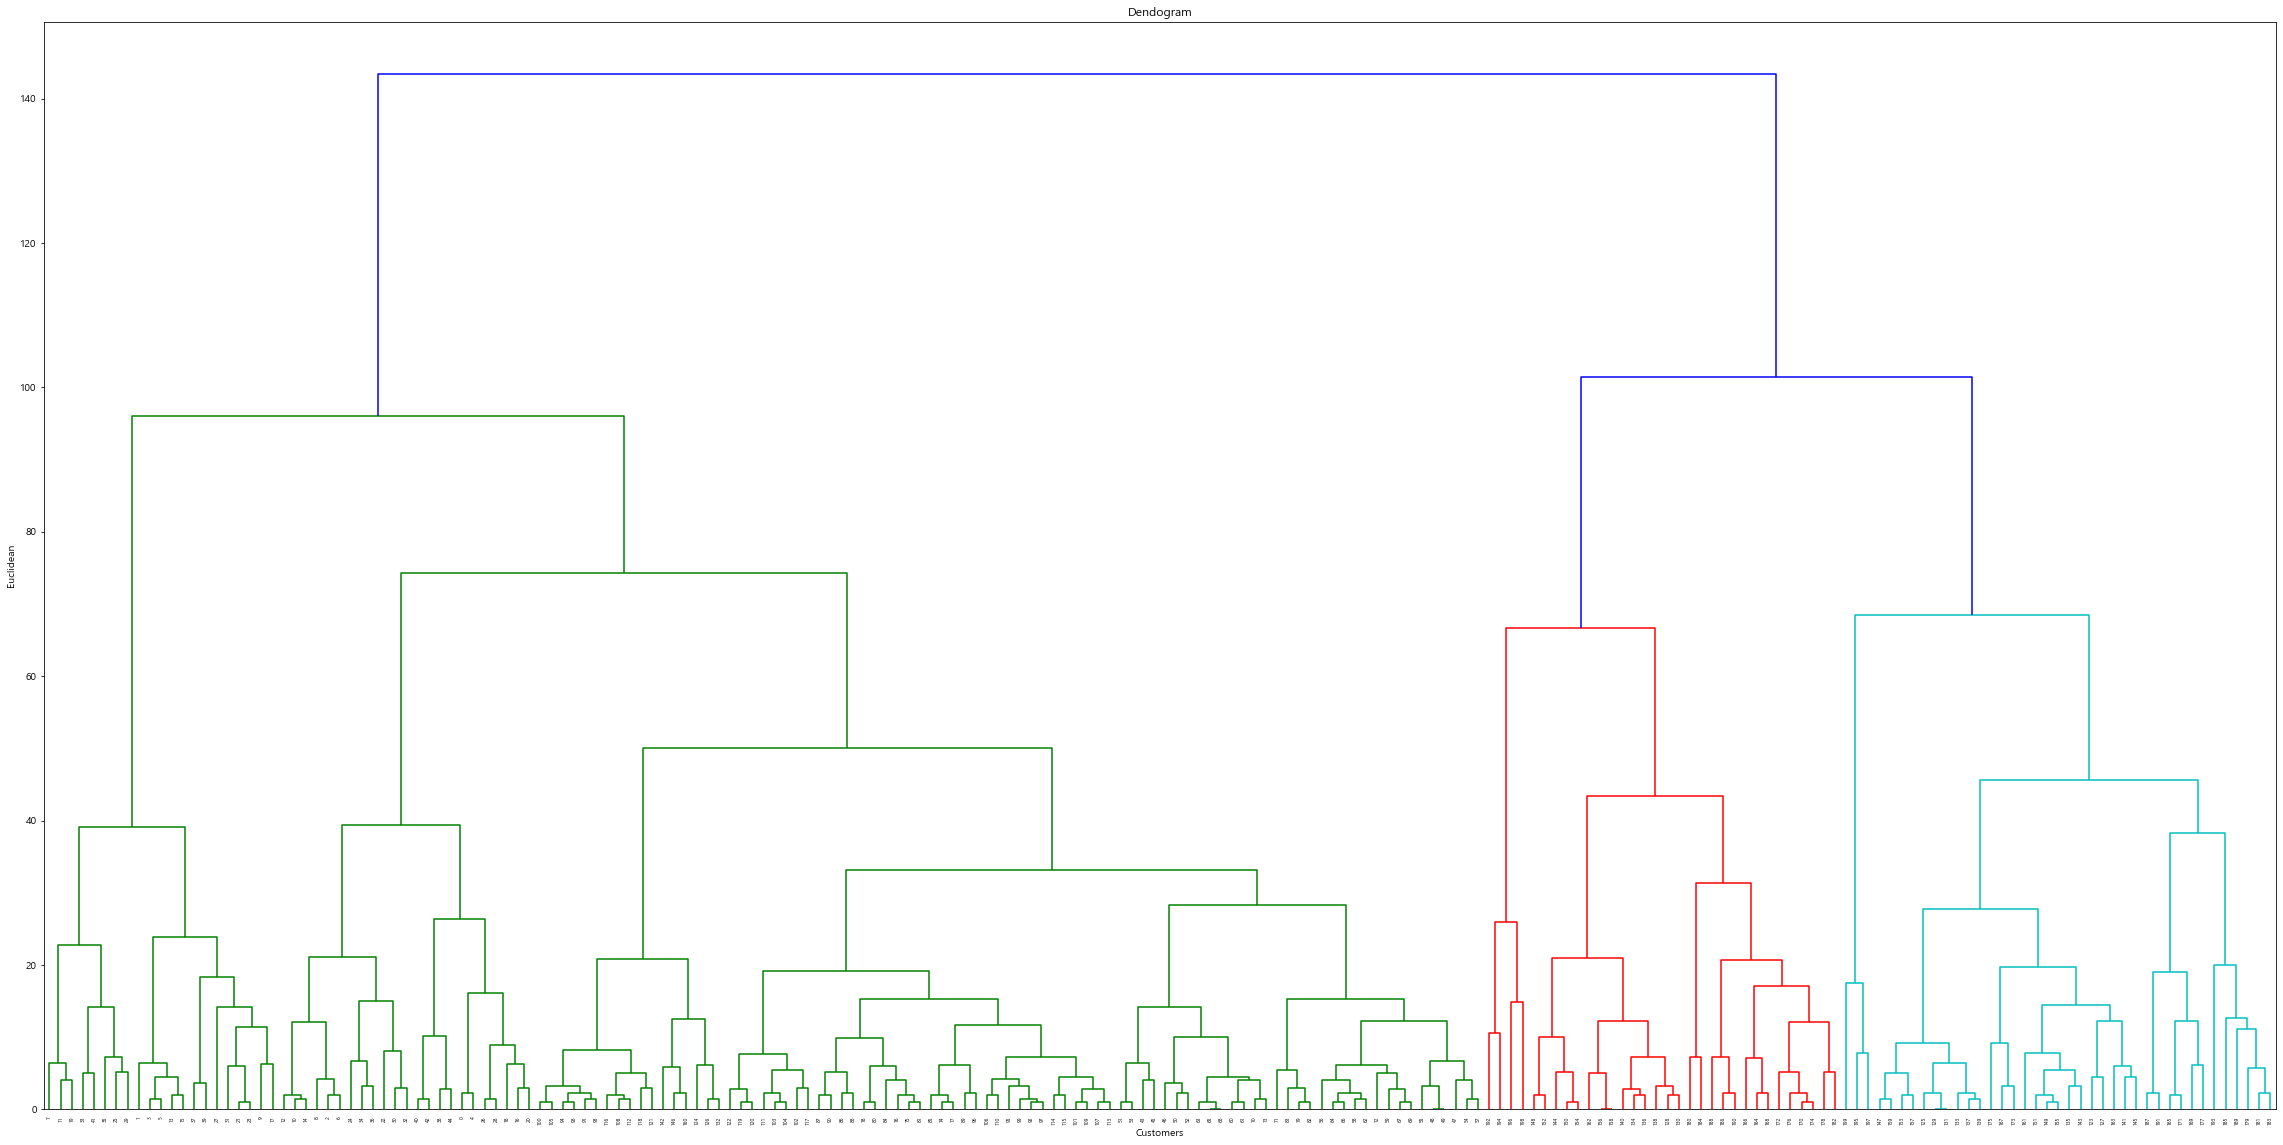

In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage = linkage(X, method='complete')

plt.figure(figsize=(40,20))
dendrogram(linkage) # 댄드로그램 그려보기

# 그 외 plot 설정
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean')
plt.show()

## 2-2. K-means Clustering

In [16]:
feature = pd.DataFrame(df.iloc[:, [3,4]].values) # feature 생성
feature

,0,1
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

# 모델 생성 및 예측
model = KMeans(n_clusters=3,algorithm='auto')
model.fit(feature)

predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

In [18]:
r.head()

,0,1,predict
0,15,39,1
1,15,81,1
2,16,6,1
3,16,77,1
4,17,40,1


Text(0.5, 1.0, 'Elbow curve')

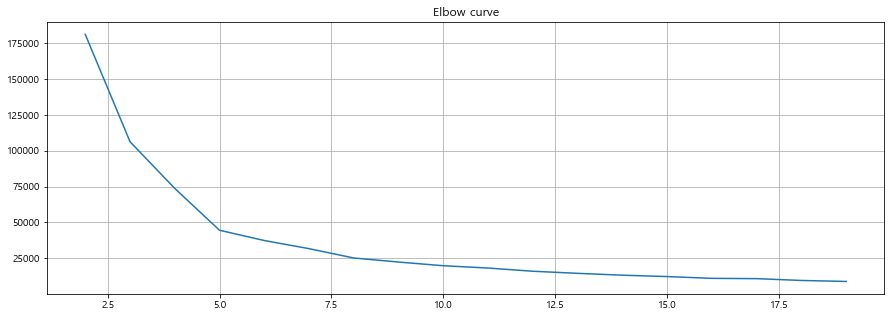

In [19]:
# Elbow point를 먼저 구하자

distorsions = []

# 군집 수 K의 변화에 따라
# Inertia Value: 군집화가 된 후에, 각 중심점에서 군집내의 데이터간의 거리를 합산한 것
# 즉, 군집의 응집도를 나타내는 값
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

# 급격하게 하강하다가 변화의 폭이 크지 않는 지점 Elbow Point를 찾는다.

이 경우 elbow point는 5가 가장 이상적인 것으로 보임!

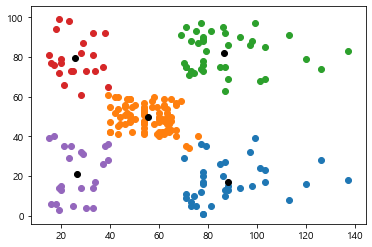

In [20]:
# Mall_Customer 데이터는 5개의 클러스터로 나눌 수 있다. 
# 이를 적용하자 (편의상 kmeans와 y_kmeans로 설정했습니당) + 구글 참조
kmeans = KMeans(n_clusters =  5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(feature)

# Visualizing the clusters   
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1])  
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1])  
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1])  
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1])  
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1])

# 클러스터별 중심위치 (산점도 형식으로 겹쳐서 나타내자!)
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], c='black')
plt.show()

In [24]:
from sklearn import metrics

labels = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward').fit(X).labels_

print('실루엣 점수: ', metrics.silhouette_score(X, labels, metric='euclidean'))

실루엣 점수:  0.5529945955148897


# 2-3. DBSCAN

In [25]:
# 이번 클러스터링은 연간 소득과 점수로 진행했습니다!
X = df[['Annual Income (k$)','Spending Score (1-100)']]

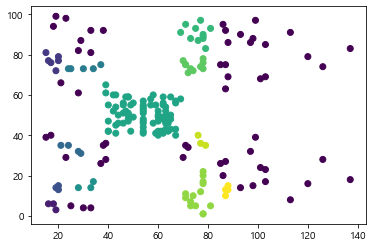

실루엣 점수:  0.13270067347083236


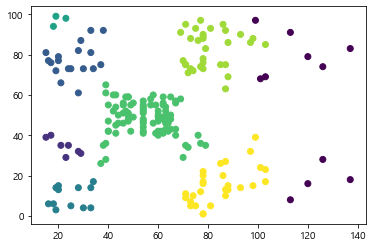

실루엣 점수:  0.475053701963407


In [26]:
from sklearn.cluster import DBSCAN

# eps = 5
cluster = DBSCAN(eps=5, min_samples=3).fit(X).fit_predict(X)
label = DBSCAN(eps=5, min_samples=3).fit(X).labels_
plt.scatter(x = X['Annual Income (k$)'],y = X['Spending Score (1-100)'], c=cluster)
 # cluster 기준으로 점 색 다르게 산점도 형식으로 나타냄
plt.show()

# 실루엣 방법으로 Evaluation (구글 참조했습니다!)
from sklearn import metrics
print('실루엣 점수: ', metrics.silhouette_score(X, label, metric='euclidean'))

# eps = 9 -> 여러 번 시행해 본 결과 가장 클러스터링이 
# 잘 되는 것으로 보이는 eps 라고 생각했습니다 :)
cluster = DBSCAN(eps=9, min_samples=3).fit(X).fit_predict(X)
label = DBSCAN(eps=9, min_samples=3).fit(X).labels_
plt.scatter(x = X['Annual Income (k$)'],y = X['Spending Score (1-100)'], c=cluster)
plt.show()
print('실루엣 점수: ', metrics.silhouette_score(X, label, metric='euclidean'))

## 2-4.Mean-Shift Clustering

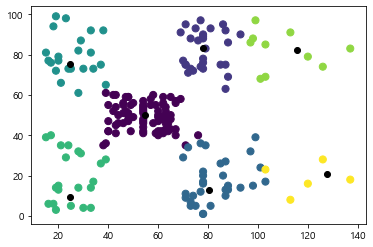

실루엣 점수:  0.5276927755500117


In [27]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# sample = 10
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=10)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
 
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'], c=labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black');
plt.show()
    
print('실루엣 점수: ', metrics.silhouette_score(X, labels, metric='euclidean'))

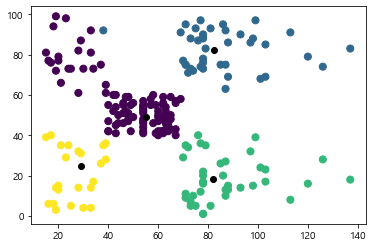

실루엣 점수:  0.49013162285715894


In [29]:
# sample = 50
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=50)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
 
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'], c=labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black');
plt.show()
    
print('실루엣 점수: ', metrics.silhouette_score(X, labels, metric='euclidean'))